In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import  linear_model
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox

In [143]:
file = pd.read_csv('marketing_customer_analysis.csv')
file.head()
file.shape



(9134, 24)

In [144]:
q1 = file.quantile(0.25)
q3 = file.quantile(0.75)
iqr = q3-q1
iqr





Customer Lifetime Value           4967.915247
Income                           62320.000000
Monthly Premium Auto                41.000000
Months Since Last Claim             17.000000
Months Since Policy Inception       47.000000
Number of Open Complaints            0.000000
Number of Policies                   3.000000
Total Claim Amount                 275.256594
dtype: float64

In [145]:
(file < (q1 - 1.5 * iqr))|(file > (q3 + 1.5 * iqr))


,Coverage,Customer,Customer Lifetime Value,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Policy Type,Renew Offer Type,Response,Sales Channel,State,Total Claim Amount,Vehicle Class,Vehicle Size
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9130,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9131,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
9132,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [146]:
file = file.drop(['Number of Open Complaints'], axis=1)
file.head()
file.shape


(9134, 23)

In [147]:
file.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,9.000000,2893.239678


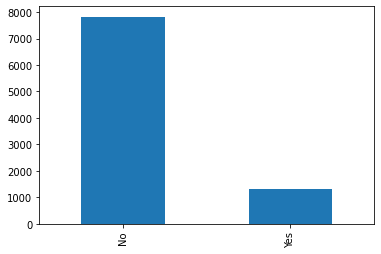

In [148]:
file['Response'].value_counts().plot(kind='bar')

In [149]:
file = file[file['Response']== 'Yes']
file.shape


(1308, 23)

In [150]:
 numerical = file.select_dtypes(include = np.number)
 numerical


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount
5,8256.297800,62902,69,14,94,2,159.383042
6,5380.898636,55350,67,0,13,9,321.600000
8,24127.504020,14072,71,13,3,2,511.200000
13,8819.018934,99845,110,23,25,8,528.000000
22,24127.504020,14072,71,13,3,2,511.200000
...,...,...,...,...,...,...,...
9110,34611.378960,20090,109,10,59,2,523.200000
9119,5479.555081,56005,68,31,30,3,326.400000
9122,25464.820590,13663,97,1,66,2,465.600000
9123,5678.050167,0,76,8,44,3,364.800000


In [168]:
catagorical = file.select_dtypes(include = np.object)
catagorical

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
5,OC83172,Oregon,Yes,Basic,Bachelor,1/25/11,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
6,XZ87318,Oregon,Yes,Basic,College,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
8,DY87989,Oregon,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
13,SJ95423,Arizona,Yes,Basic,High School or Below,1/10/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Medsize
22,YH23384,Arizona,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,Suburban,Divorced,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9110,RA89822,California,Yes,Basic,High School or Below,1/14/11,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Sports Car,Medsize
9119,YX35990,California,Yes,Basic,Master,1/13/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Small
9122,FH43628,California,Yes,Extended,College,2/1/11,Retired,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Small
9123,WZ45103,California,Yes,Extended,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Small


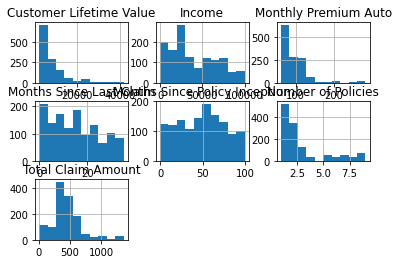

In [152]:
numerical.hist()
plt.show()

In [153]:
y = numerical['Total Claim Amount']
X = numerical.drop(['Total Claim Amount'], axis=1)

In [132]:
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies
5,8256.297800,62902,69,14,94,2
6,5380.898636,55350,67,0,13,9
8,24127.504020,14072,71,13,3,2
13,8819.018934,99845,110,23,25,8
22,24127.504020,14072,71,13,3,2
...,...,...,...,...,...,...
9110,34611.378960,20090,109,10,59,2
9119,5479.555081,56005,68,31,30,3
9122,25464.820590,13663,97,1,66,2
9123,5678.050167,0,76,8,44,3


In [187]:
transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)
print(x_normalized.shape)
x_normalized=pd.DataFrame(x_normalized, columns=X.columns)

(1308, 6)


In [182]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(catagorical)
print(encoder.categories_)
encoded = encoder.transform(catagorical).toarray()
print(encoded)
onehot_encoded = pd.DataFrame(encoded)#columns=encoder.categories_)
onehot_encoded.head()



[array(['AA16582', 'AA35519', 'AA56476', ..., 'ZX93551', 'ZZ22047',
       'ZZ49347'], dtype=object), array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['1/1/11', '1/10/11', '1/11/11', '1/12/11', '1/13/11', '1/14/11',
       '1/15/11', '1/16/11', '1/17/11', '1/18/11', '1/19/11', '1/2/11',
       '1/20/11', '1/21/11', '1/23/11', '1/24/11', '1/25/11', '1/26/11',
       '1/27/11', '1/28/11', '1/29/11', '1/3/11', '1/30/11', '1/31/11',
       '1/5/11', '1/6/11', '1/7/11', '1/8/11', '1/9/11', '2/1/11',
       '2/10/11', '2/11/11', '2/12/11', '2/13/11', '2/14/11', '2/15/11',
       '2/16/11', '2/17/11', '2/18/11', '2/19/11', '2/2/11', '2/20/11',
       '2/21/11', '2/22/11', '2/23/11', '2/24/11', '2/25/11', '2/26/11',
       '2/27/11', '2/28/11', '2/3/11', '2/4/11', '2/5/1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [184]:
from sklearn.preprocessing import LabelEncoder
label_encoded = LabelEncoder().fit(catagorical['State']).transform(catagorical['State']) # ordered wrt value counts
label_encoded = pd.DataFrame(label_encoded, columns=['State'])
print(label_encoded)
label_encoded.value_counts()# total claim amount may be change in different state.

      State
0         3
1         3
2         3
3         0
4         0
...     ...
1303      1
1304      1
1305      1
1306      1
1307      1

[1308 rows x 1 columns]


State
1        456
3        376
0        243
2        124
4        109
dtype: int64

In [188]:
x_normalized

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies
0,0.157149,0.629996,0.036036,0.400000,0.949495,0.125
1,0.084873,0.554359,0.027027,0.000000,0.131313,1.000
2,0.556088,0.140938,0.045045,0.371429,0.030303,0.125
3,0.171294,1.000000,0.220721,0.657143,0.252525,0.875
4,0.556088,0.140938,0.045045,0.371429,0.030303,0.125
...,...,...,...,...,...,...
1303,0.819611,0.201212,0.216216,0.285714,0.595960,0.125
1304,0.087353,0.560919,0.031532,0.885714,0.303030,0.250
1305,0.589703,0.136842,0.162162,0.028571,0.666667,0.125
1306,0.092342,0.000000,0.067568,0.228571,0.444444,0.250


In [190]:
X = pd.concat([x_normalized,label_encoded], axis=1)
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,State
0,0.157149,0.629996,0.036036,0.400000,0.949495,0.125,3
1,0.084873,0.554359,0.027027,0.000000,0.131313,1.000,3
2,0.556088,0.140938,0.045045,0.371429,0.030303,0.125,3
3,0.171294,1.000000,0.220721,0.657143,0.252525,0.875,0
4,0.556088,0.140938,0.045045,0.371429,0.030303,0.125,0
...,...,...,...,...,...,...,...
1303,0.819611,0.201212,0.216216,0.285714,0.595960,0.125,1
1304,0.087353,0.560919,0.031532,0.885714,0.303030,0.250,1
1305,0.589703,0.136842,0.162162,0.028571,0.666667,0.125,1
1306,0.092342,0.000000,0.067568,0.228571,0.444444,0.250,1


In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [193]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1046, 7)
(262, 7)
(1046,)
(262,)


In [194]:
X_train.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,State
16,0.009792,0.000000,0.040541,0.685714,0.101010,0.000,1
538,0.083314,0.251730,0.027027,0.085714,0.000000,0.625,1
532,0.014530,0.768501,0.013514,0.057143,0.686869,0.000,1
285,0.050526,0.374420,0.171171,0.257143,0.171717,0.000,0
365,0.068433,0.130572,0.283784,0.800000,0.494949,0.000,3


In [195]:
X_test.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,State
173,0.376423,0.351495,0.054054,0.714286,0.565657,0.125,3
843,0.038300,0.313266,0.139640,0.685714,0.959596,0.000,3
996,0.058467,0.605689,0.207207,0.257143,0.181818,0.000,3
992,0.168677,0.000000,0.256757,0.400000,0.646465,0.375,0
12,0.098593,0.231268,0.157658,0.800000,0.909091,0.500,1


In [197]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [198]:
from sklearn.metrics import r2_score

predictions = lm.predict(X_test)
r2_score(y_test, predictions)

0.5894204053890084

In [200]:
from sklearn.metrics import mean_squared_error, r2_score


In [201]:
mse = mean_squared_error(y_test, predictions)
print(mse)

22544.236738341384


In [203]:
import math

In [204]:
rmse = math.sqrt(mse)
print(rmse)

150.14738338826083


In [205]:
r2 = r2_score(y_test, predictions)
r2

0.5894204053890084

In [206]:
from sklearn.metrics import mean_absolute_error

In [208]:
mae = mean_absolute_error(y_test, predictions)
mae

99.09856783498999